# Notebook analysing feature vectors by AdaFace and MagFace

In [1]:
# Load libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
sns.set(style="white") 
%matplotlib inline

### Images

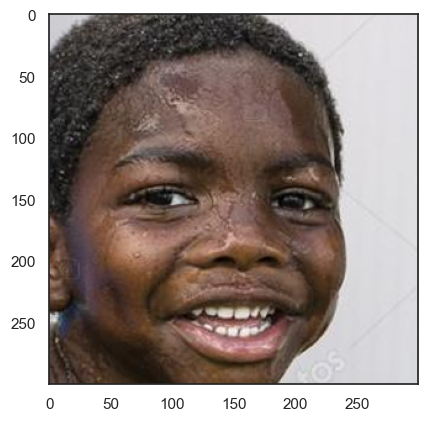

In [2]:
img = cv2.imread("/Users/gabriellakierulff/Library/Mobile Documents/com~apple~CloudDocs/Desktop/HCAI/speciale/Master_Thesis/data/raw_full/children/African_0/African_0_1.png")
#img = cv2.resize(img, (112, 112))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
img.shape

(300, 300, 3)

### MagFace feature vectors

source: https://github.com/IrvingMeng/MagFace/blob/main/inference/examples.ipynb

In [2]:
# Load images with homedirectory prefix

# YLFW
with open('../data/raw/YLFW_bench/feat.list', 'r') as f:
    lines = f.readlines()

In [3]:
def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def show(idx_):
    imgname = imgnames[idx_]
    img = cv2.imread(imgname)
    imshow(img)
    print(img_2_mag[imgname], imgname)    

In [4]:
# YLFW
with open('../data/raw/YLFW_bench/feat.list', 'r') as f:
    lines = f.readlines()

In [5]:
img_2_feats = {}
img_2_mag = {}
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0]
    imgname = "/"+"/".join(imgname.split("/")[4:])
    feats = [float(e) for e in parts[1:]]
    mag = np.linalg.norm(feats)
    img_2_feats[imgname] = feats/mag
    img_2_mag[imgname] = mag #magnitude of the feature vector

In [6]:
imgnames = list(img_2_mag.keys())
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags) #sorts the magnitude/quality of the images

In [7]:
H, W = 112, 112
NH, NW = 1, 10
canvas = np.zeros((NH * H, NW * W, 3), np.uint8)


for i, ele in enumerate(sort_idx[:10]):
    imgname = ".."+imgnames[ele]
    img = cv2.imread(imgname)
    img = cv2.resize(img, (112, 112))
    canvas[int(i / NW) * H: (int(i / NW) + 1) * H, (i % NW) * W: ((i % NW) + 1) * W, :] = img    
    

[ WARN:0@1.766] global loadsave.cpp:248 findDecoder imread_('../data/raw/YLFW_bench/data_p2/Asian_14/Asian_14_6.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


[7.52, 7.61, 8.38, 8.5, 8.64, 8.77, 8.78, 8.84, 9.11, 9.18]


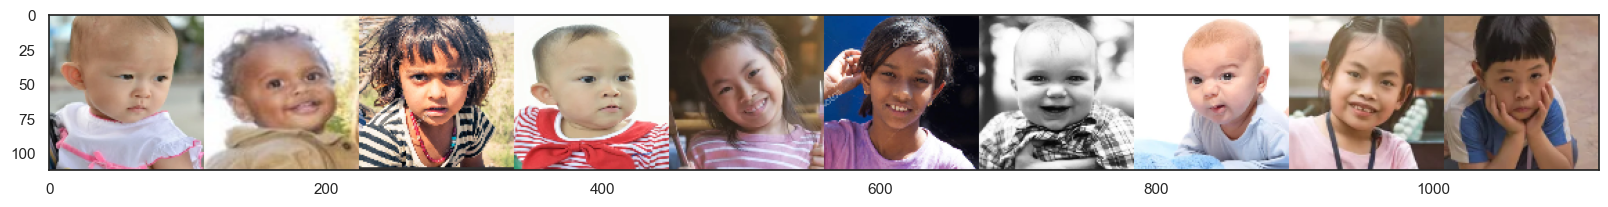

In [ ]:
plt.figure(figsize=(20, 20))
print([float('{0:.2f}'.format(mags[idx_])) for idx_ in sort_idx[:10]])
imshow(canvas)

#### Visualize recognition...

In [ ]:
#feats = np.array([img_2_feats[imgnames[ele]] for ele in sort_idx[:10]])
feats = np.array([img_2_feats[imgnames[ele]] for ele in range(10)]) #unsorted image quality
ids = np.array([imgnames[ele] for ele in range(10)])

sim_mat = np.dot(feats, feats.T)

In [ ]:
ids

array(['/data/raw/YLFW_bench/data_p2/African_1/African_1_4.png',
       '/data/raw/YLFW_bench/data_p2/African_1/African_1_11.png',
       '/data/raw/YLFW_bench/data_p2/African_0/African_0_1.png',
       '/data/raw/YLFW_bench/data_p2/African_0/African_0_0.png',
       '/data/raw/YLFW_bench/data_p2/Asian_386/Asian_386_40.png',
       '/data/raw/YLFW_bench/data_p2/Asian_386/Asian_386_27.png',
       '/data/raw/YLFW_bench/data_p2/Asian_386/Asian_386_30.png',
       '/data/raw/YLFW_bench/data_p2/Asian_386/Asian_386_43.png',
       '/data/raw/YLFW_bench/data_p2/Asian_386/Asian_386_42.png',
       '/data/raw/YLFW_bench/data_p2/Asian_386/Asian_386_38.png'],
      dtype='<U55')

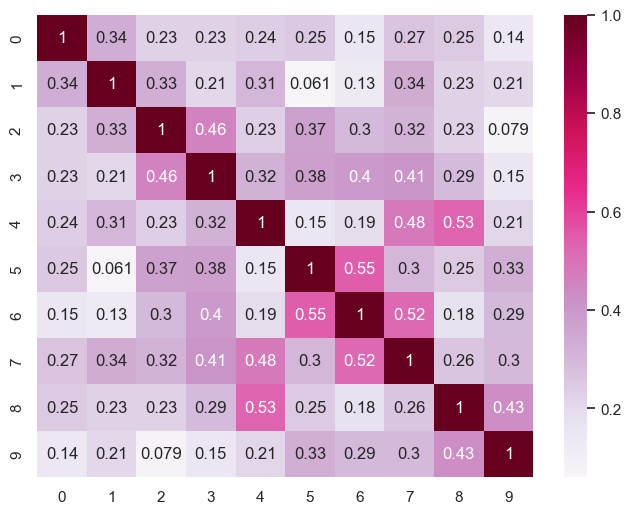

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))  
ax = sns.heatmap(sim_mat, cmap="PuRd", annot=True)

### AdaFace feature vectors

In [29]:
# File path
file_path = '/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/master_thesis/saved_predictions/image_data_similarity_scores_ylfw.pt'

# Load the file
data = torch.load(file_path)
data.keys()

dict_keys(['image_id', 'feature_vectors', 'similarity_scores'])

In [30]:
len(data["feature_vectors"])

34

In [31]:
feats = [data["feature_vectors"][ele] for ele in range(10)]
sim_mat = torch.cat(feats) @ torch.cat(feats).T #cosine similarity score

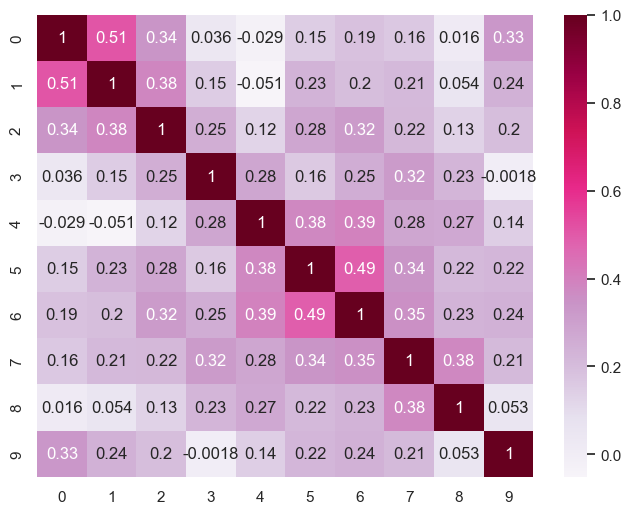

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))  
ax = sns.heatmap(sim_mat.detach().numpy() , cmap="PuRd", annot=True)

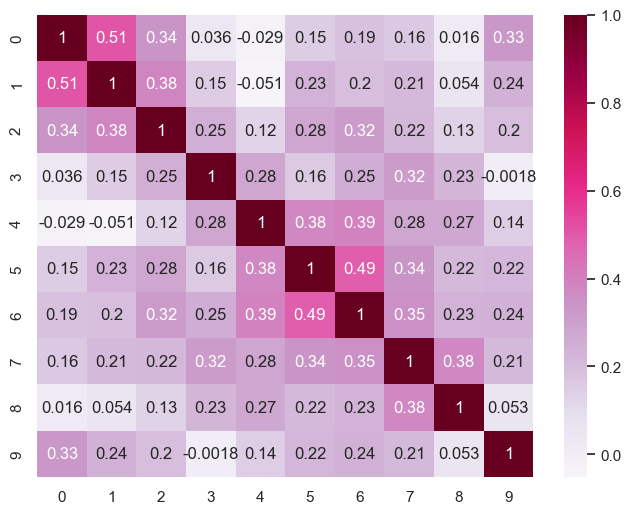

In [33]:
# check om det er det samme for similarity scores der er gemt. -- JEP
sim_score_ada = data['similarity_scores'][:10,:10]
fig, ax = plt.subplots(figsize=(8, 6))  
ax = sns.heatmap(sim_score_ada.detach().numpy() , cmap="PuRd", annot=True)

##